# Titanic Prediction project 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.shape

(891, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data have float64(2), int64(6), object(5)


In [9]:
#dropping cabin, passengerId
df.drop(columns=['Cabin','PassengerId'], inplace=True)


# Filling Missing values

In [15]:
#impute missing values for age by mean
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [16]:
# Impute missing values for Embarked
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

# EDA

In [17]:
corr=df.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

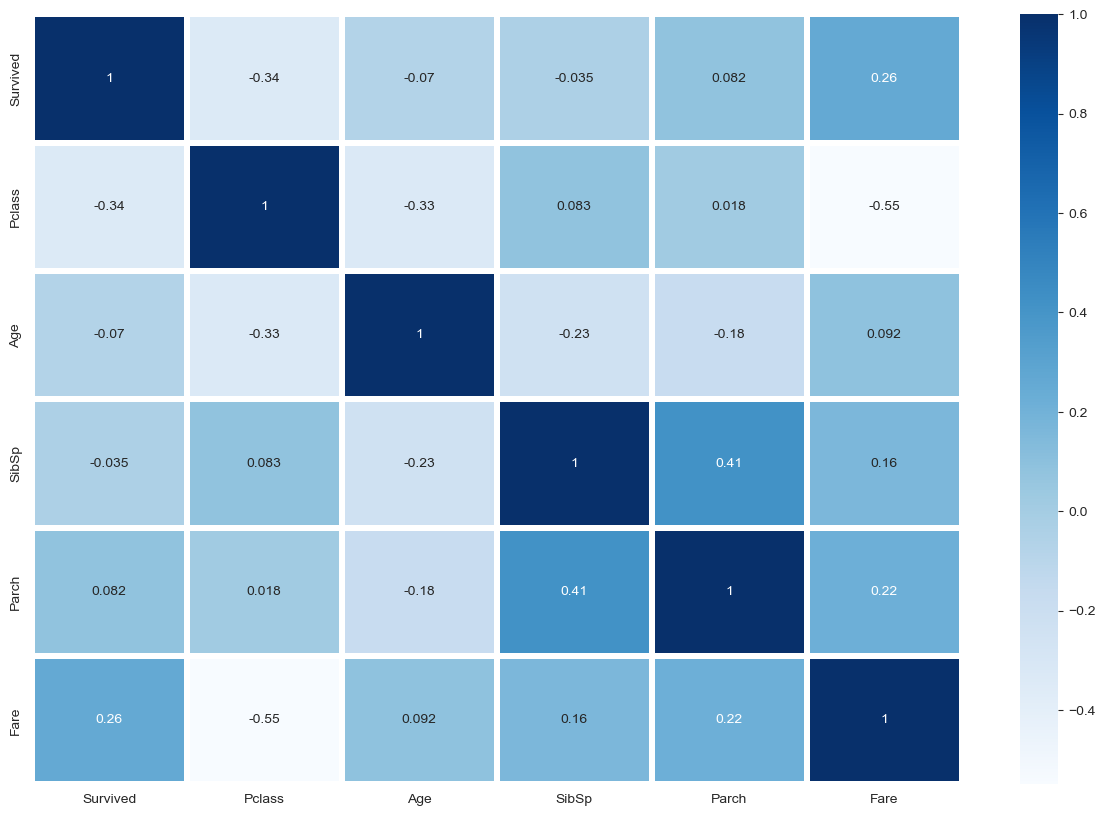

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='Blues',annot=True,linewidth=3)

Here we can notice Parch(Number of Parents/Children Aboard) column is highly positive corelated with Survived column means there were high impact on survival
and Age is negatively corelated with survival that age has high negative impact on survival.

<AxesSubplot:xlabel='Survived', ylabel='count'>

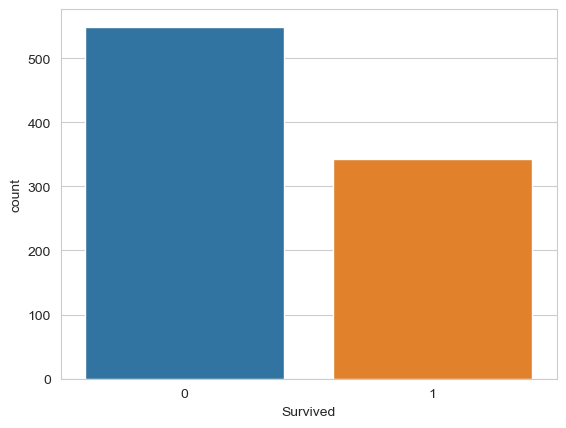

In [19]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=df)

We can see here Data is not fully balance but we'll treat the imbalance.

We have around 330 survived and around 560 not survived people.

<AxesSubplot:xlabel='Survived', ylabel='count'>

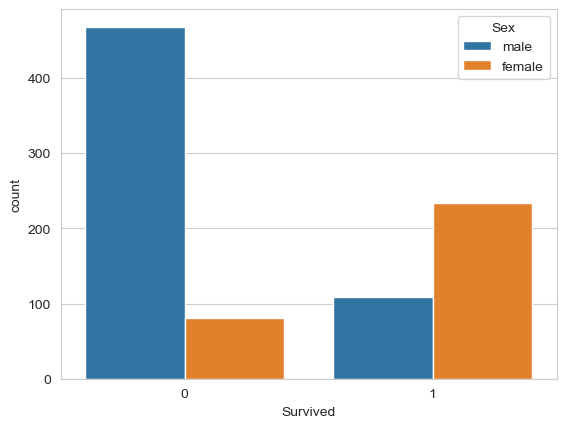

In [20]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=df,hue='Sex')

 Here we check count servived or and not survived column, there we see not survived male count is around 500 and not survived female count below than 100

and the other side we see in survived count females are more than males that means at the time of incident female were the prirority to be survived.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

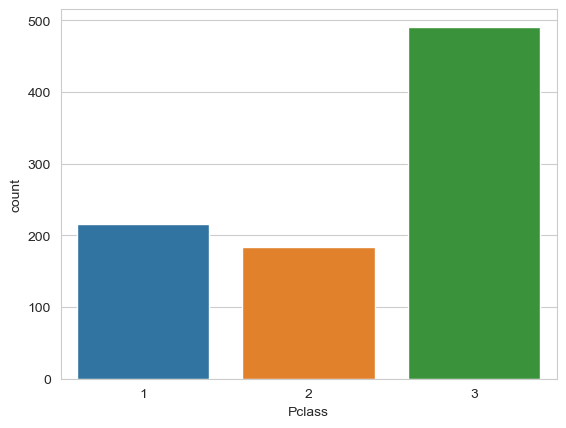

In [21]:
sns.countplot(x='Pclass', data=df)


we notice here most of the people were in Pclass 3, must be including staff and other workers on ship.


<AxesSubplot:xlabel='Survived', ylabel='count'>

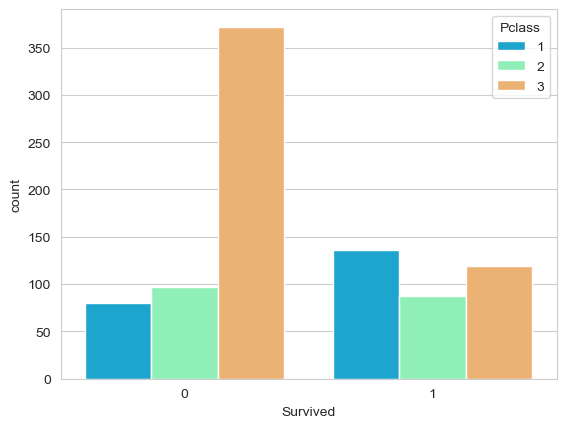

In [23]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=df,hue='Pclass',palette='rainbow')


Here we in Pclass 3 having more not survived people that means most of the people were in Pclass 3.

There we notice first prirority were given to Pclass 1 get survive Pclass 3 was the last prirority.

<AxesSubplot:xlabel='Age'>

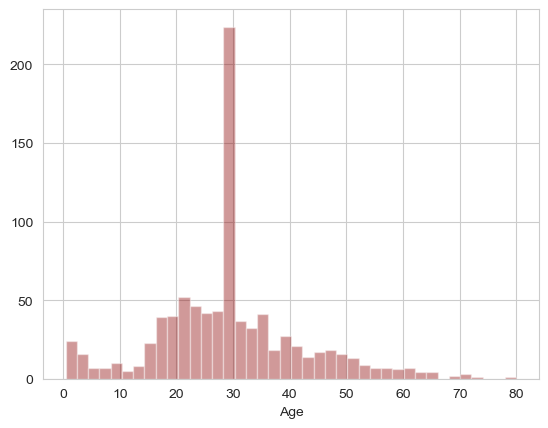

In [24]:
sns.distplot(df['Age'].dropna(),kde=False, color='darkred',bins=40)


<AxesSubplot:xlabel='SibSp', ylabel='count'>

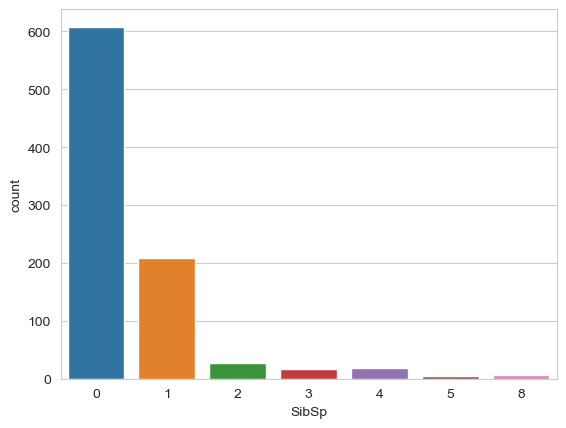

In [25]:
sns.countplot(x='SibSp',data=df)


Here we see the people those are with their sibling.

around 600 people don't have siblings or spouse, arounf 200 people having 1 sibling or spouse and other people having more that 1 sibling and spouse.




<AxesSubplot:>

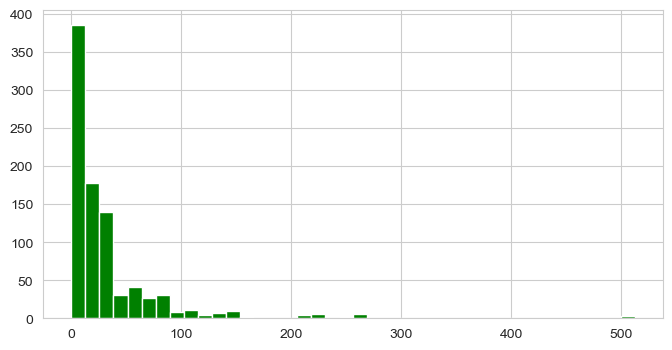

In [26]:
df['Fare'].hist(bins=40,color='green',figsize=(8,4))


Here we see the fare of travel(people who bought ticket) most (around 375) of people we notice having 0 fare means they must be worked and staff member on ship

<AxesSubplot:xlabel='Parch', ylabel='count'>

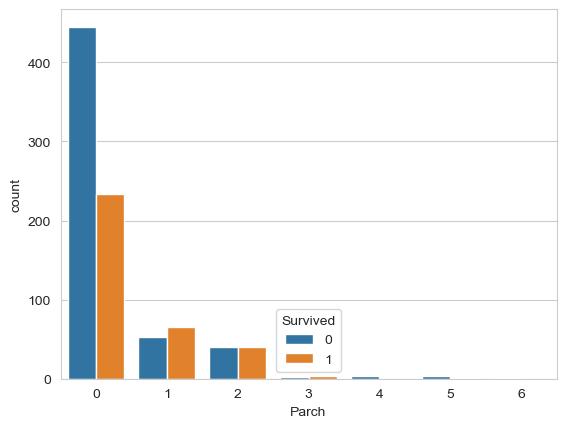

In [27]:
sns.countplot(x='Parch', hue='Survived', data=df)


Here we can notice most survived was travelling alone having no Parents/Children while journey.


# Data Cleaning


In [28]:
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

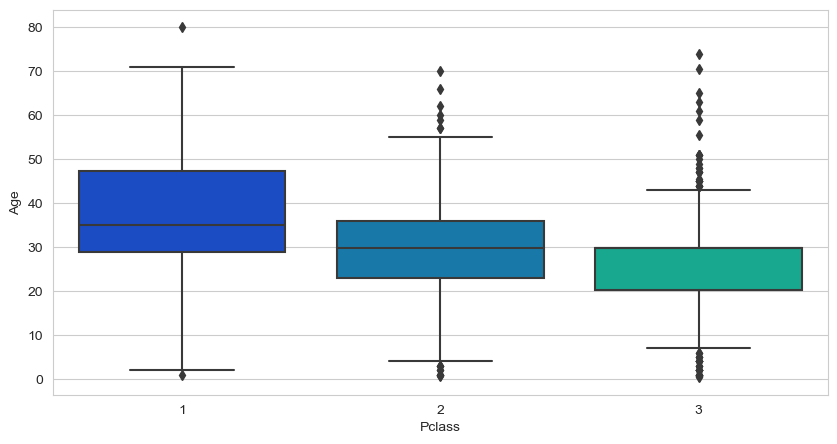

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',y='Age',palette='winter', data=df)

There are 3 passenger class in our dataset

We notice here wealtheir in higher class seems older which makes sense. we'll use this average age values to impute based on Pclass for age.

Here we can see Pclass 1 average of age is arond 37 and Pclass 2 it's around 29 Pclass 3 it's around 24

so filling the age NaN values with average of Age.

In [31]:
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

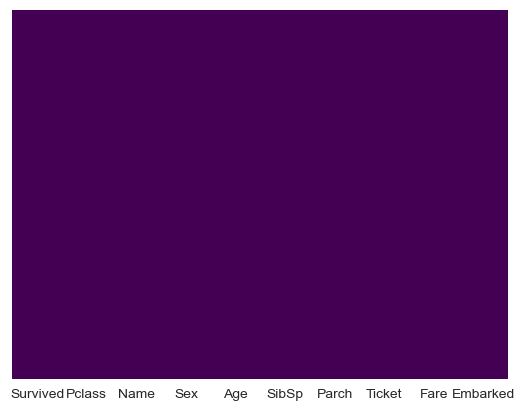

In [33]:
sns.heatmap(df.isnull(),cmap='viridis', yticklabels=False, cbar=False)


Here we can notice null values in Embarked columns have been filled



Dropping unnecessary columns there will be no use of these columns for prediction.

In [37]:
df.drop('Name', axis=1, inplace=True)


In [38]:
df.drop('Ticket', axis=1, inplace=True)


In [39]:
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [40]:
df.dtypes


Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

so here we have int64(4), object(2) and float64(2) values in the new data set




# Using LabelEncoder for converting categorical to numerical



In [41]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])
df['Embarked']= le.fit_transform(df['Embarked'])

In [42]:
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [43]:
df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [44]:
df.dtypes


Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

data have int64(6) and float64(2) values

# Outliers Removal


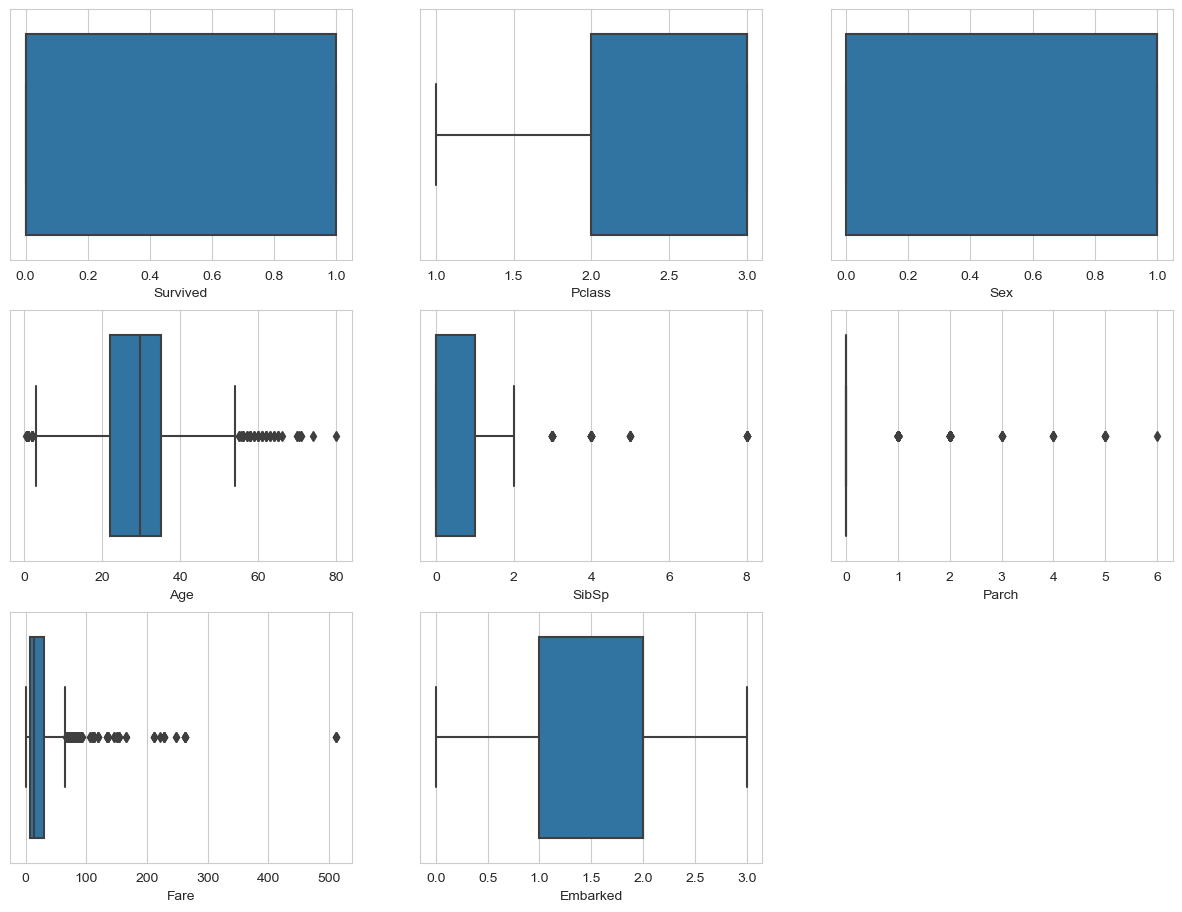

In [47]:
plt.figure(figsize=(15,15))
for i in enumerate(df):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(df[i[1]])


Here we can see few columns having Outliers present . So let's remove them.



# removing outliers

# by Zscore

In [50]:
from scipy import stats
from scipy.stats import zscore
z= np.abs(zscore(df))
print(np.where(z>3))


(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [52]:
df_1= df[(z<3).all(axis=1)]
print("With outliers::", df.shape)
print("After removing outliers::",df_1.shape)

With outliers:: (891, 8)
After removing outliers:: (820, 8)


using zscore method it removes 71 rows.



# IQR method


In [54]:
from scipy import stats
IQR = stats.iqr(df[['Survived','Pclass','Parch','Age','Fare','SibSp','Parch']])
IQR

7.875

In [56]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [57]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(598, 8)


Using IQR method there is Huge data loss . So considering the ZSCORE Method



In [58]:
df=df_1


In [59]:
df.shape


(820, 8)

so here we have 820 rows and 8 columns after removing outliers.



# Skewness Handling


In [60]:
df.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

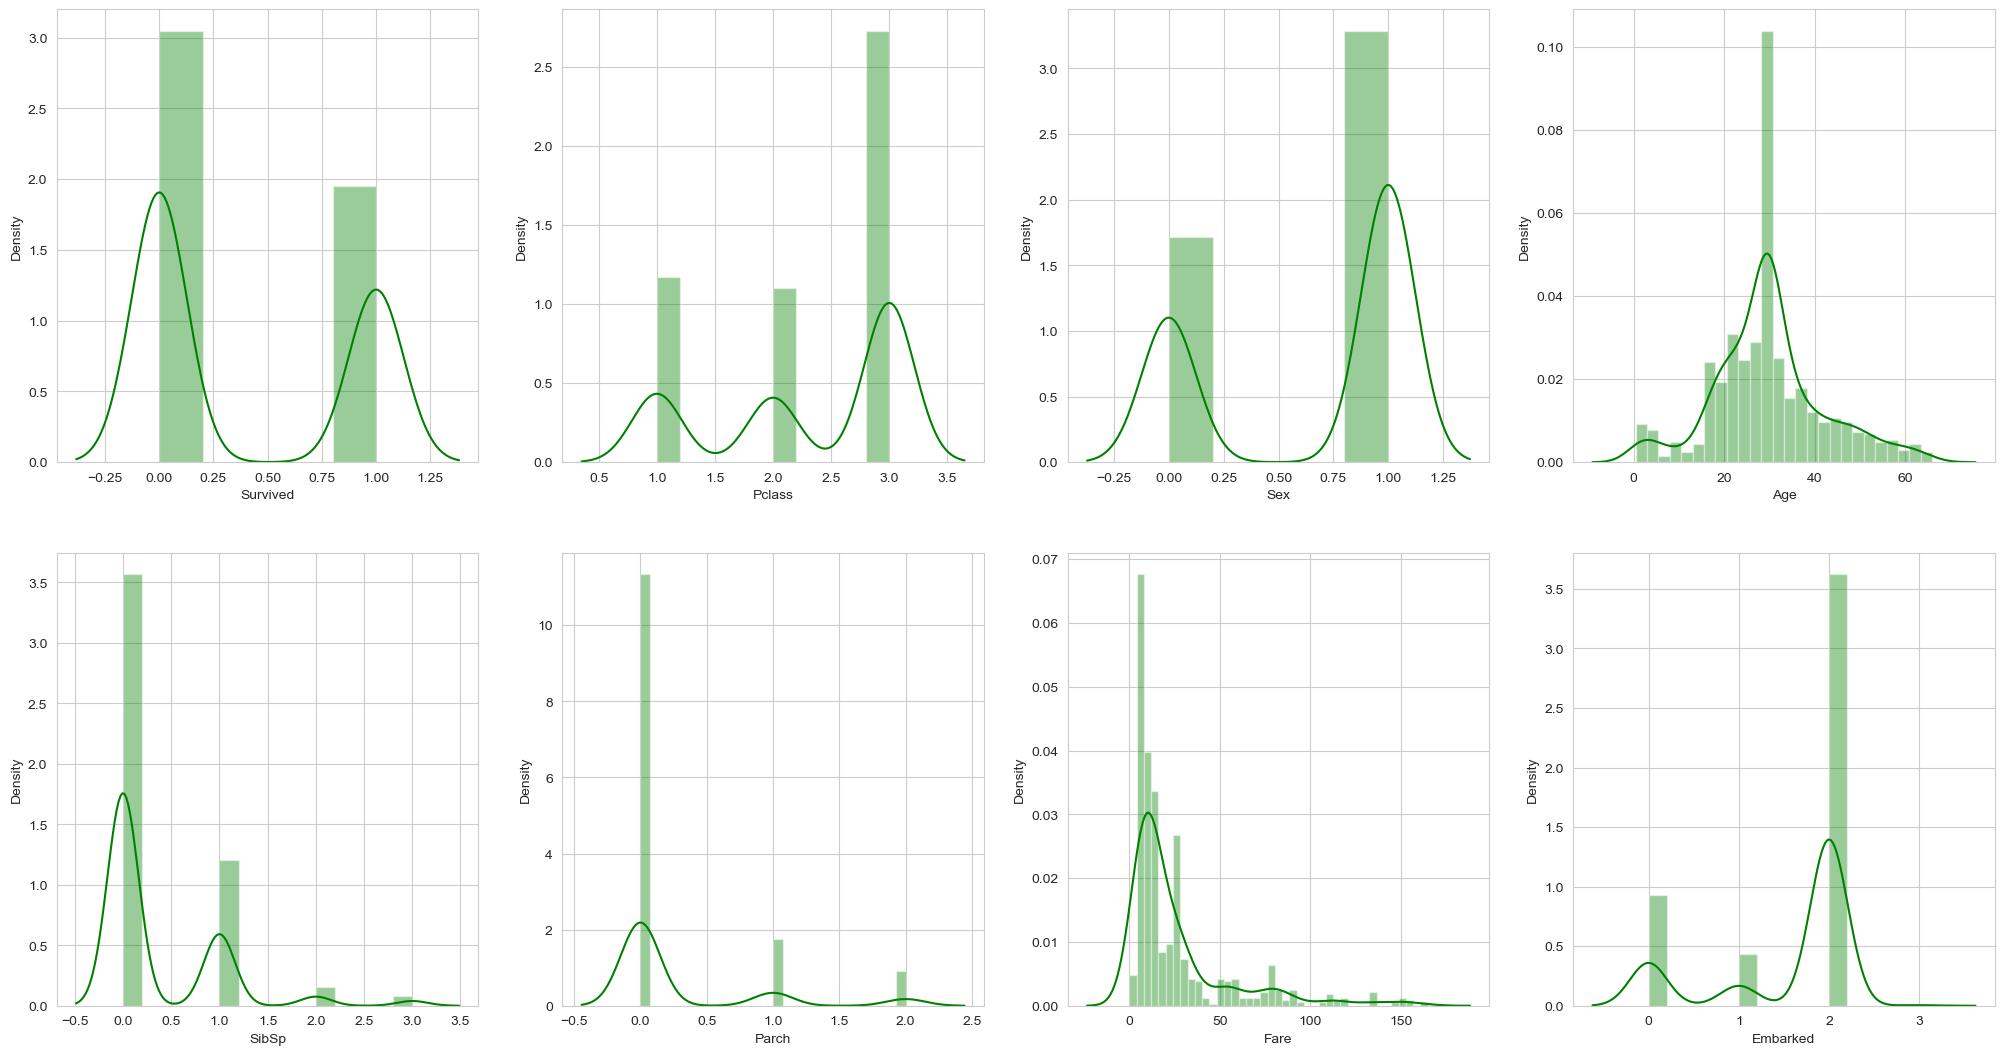

In [61]:
plt.figure(figsize=(25,20))
for i in enumerate(df):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [62]:
df.skew()


Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.257511
dtype: float64

we can notice that there is skewness in  the columns Pclass, sex, sibsp, parch, Fare, Embarked,
but we only treat the numerical columns (given below) because other columns were changed catogorical to numerical.
that is  Pclass, SibSp, Parch, Fare


In [64]:
from sklearn.preprocessing import power_transform
df[['Pclass','SibSp','Parch','Fare']]=power_transform(df[['Pclass','SibSp','Parch','Fare']],method='yeo-johnson')


In [65]:
df.skew()


Survived    0.450825
Pclass     -0.429718
Sex        -0.664152
Age         0.318314
SibSp       0.948944
Parch       1.581505
Fare       -0.018602
Embarked   -1.257511
dtype: float64

We can notice skewness almost removed from the targeted columns.



# Dividing Data into x and y


In [66]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [67]:
x.shape


(820, 7)

In [68]:
y.shape


(820,)

# Scalling x values


In [69]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [70]:
pd.DataFrame(x)


,0,1,2,3,4,5,6
0,1.000000,1.0,0.329064,0.926317,0.0,0.445667,0.666667
1,0.000000,0.0,0.573041,0.926317,0.0,0.855230,0.000000
2,1.000000,0.0,0.390058,0.000000,0.0,0.461339,0.666667
3,0.000000,0.0,0.527295,0.926317,0.0,0.803218,0.666667
4,1.000000,1.0,0.527295,0.000000,0.0,0.464103,0.666667
...,...,...,...,...,...,...,...
815,0.373447,1.0,0.405306,0.000000,0.0,0.549814,0.666667
816,0.000000,0.0,0.283318,0.000000,0.0,0.701010,0.666667
817,1.000000,0.0,0.446464,0.926317,1.0,0.656525,0.666667
818,0.000000,1.0,0.390058,0.000000,0.0,0.701010,0.000000


# Imbalanced Learn
Using RandomUnderSampler



<AxesSubplot:xlabel='Survived', ylabel='count'>

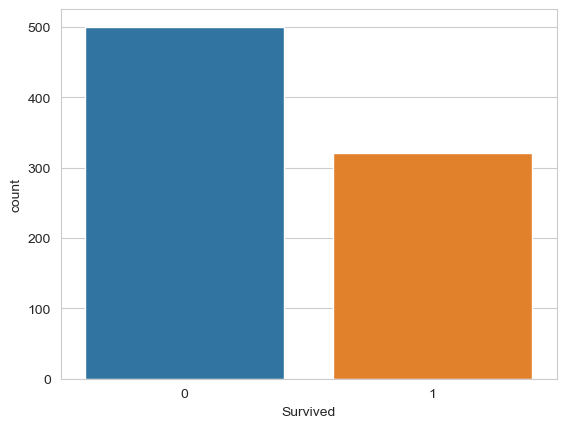

In [72]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=df)

We can see here Data is not fully balanced but we'll treat the imbalance

we have around 330 survived and 500 not survived people

In [74]:
from imblearn.under_sampling import RandomUnderSampler


In [75]:
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus= rus.fit_resample(x,y)
print('Original Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

Original Target dataset shape: (820,)
Resample Target dataset shape (640,)


<AxesSubplot:xlabel='Survived', ylabel='count'>

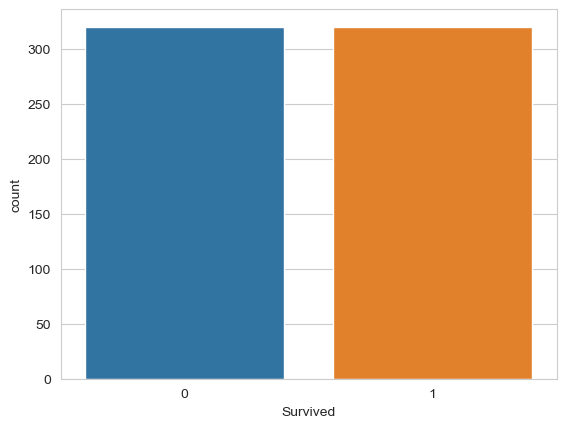

In [76]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

Now we have balanced data for model training



# Spliting Train and Test Data


In [77]:
from sklearn.model_selection import train_test_split


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)



In [80]:
x_train.shape


(467, 7)

In [81]:
x_test.shape


(173, 7)

In [82]:
y_train.shape


(467,)

In [83]:
y_test.shape


(173,)

# Model Building


In [84]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# Logistic Regression


In [85]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score;",np.mean(logreg_score))

cross validation score; 0.76875


In [86]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7745664739884393
[[77 15]
 [24 57]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        92
           1       0.79      0.70      0.75        81

    accuracy                           0.77       173
   macro avg       0.78      0.77      0.77       173
weighted avg       0.78      0.77      0.77       173

Training accuracy:: 0.7815845824411135
Test accuracy:: 0.7745664739884393


# Decision Tree Classifier


In [87]:
dtc= DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7515625


In [88]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7225433526011561
[[67 25]
 [23 58]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74        92
           1       0.70      0.72      0.71        81

    accuracy                           0.72       173
   macro avg       0.72      0.72      0.72       173
weighted avg       0.72      0.72      0.72       173

Training accuracy:: 0.9850107066381156
Test accuracy:: 0.7225433526011561


# KNeighborsClassifier

In [89]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7546875


In [90]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.7861271676300579
[[74 18]
 [19 62]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        92
           1       0.78      0.77      0.77        81

    accuracy                           0.79       173
   macro avg       0.79      0.78      0.79       173
weighted avg       0.79      0.79      0.79       173

Training accuracy:: 0.8372591006423983
Test accuracy:: 0.7861271676300579


# RandomForestClassifier

In [91]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score rfc:",np.mean(rfc_score))

cross validation score rfc: 0.778125


In [92]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8208092485549133
[[80 12]
 [19 62]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        92
           1       0.84      0.77      0.80        81

    accuracy                           0.82       173
   macro avg       0.82      0.82      0.82       173
weighted avg       0.82      0.82      0.82       173

Training accuracy:: 0.9850107066381156
Test accuracy:: 0.8208092485549133


# Ensemble Technique


# 1. AdaBoost Classifier


In [93]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.76875


In [94]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.815028901734104
[[74 18]
 [14 67]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        92
           1       0.79      0.83      0.81        81

    accuracy                           0.82       173
   macro avg       0.81      0.82      0.81       173
weighted avg       0.82      0.82      0.82       173

Training accuracy:: 0.815845824411135
Test accuracy:: 0.815028901734104


# 2. Bagging Classifier


In [95]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Bagging Classifier:",np.mean(bgc_score))

cross validation score for Bagging Classifier: 0.7671875


In [96]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.791907514450867
[[73 19]
 [17 64]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        92
           1       0.77      0.79      0.78        81

    accuracy                           0.79       173
   macro avg       0.79      0.79      0.79       173
weighted avg       0.79      0.79      0.79       173

Training accuracy:: 0.961456102783726
Test accuracy:: 0.791907514450867


# 3. Gradient Boosting Classifier


In [97]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.7875


In [98]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8034682080924855
[[79 13]
 [21 60]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        92
           1       0.82      0.74      0.78        81

    accuracy                           0.80       173
   macro avg       0.81      0.80      0.80       173
weighted avg       0.80      0.80      0.80       173

Training accuracy:: 0.9014989293361885
Test accuracy:: 0.8034682080924855


Observation: Choosing:

    ADA BOOST CLASSIFIER as final model

     for Hyper Parameter tuning because both train and test accuracies are pretty close.

   Rest of the models having huge difference between train and test accuracies so not considering them.

# HYPER PERAMETER TUNING


In [99]:
adb=AdaBoostClassifier()
param_grid={
    'algorithm' : ['SAMME.R'],
    'n_estimators':[50,200,10],
    'learning_rate':[0.1,0.5,1.0],
    'random_state':[10]
}


In [100]:
adb_grid=GridSearchCV(AdaBoostClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)


In [101]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Accuracy after parameter tuning:: 0.8208092485549133


In [102]:
adb_grid.best_params_


{'algorithm': 'SAMME.R',
 'learning_rate': 0.5,
 'n_estimators': 10,
 'random_state': 10}

# Model training with best Parameters


In [103]:
best_param={
    'algorithm': ['SAMME.R'],
    'learning_rate': [0.5],
    'n_estimators': [10],
    'random_state': [10]       }

In [104]:
best_adb_grid=GridSearchCV(AdaBoostClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)


In [105]:
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8208092485549133


As we can notice after HYPER PERAMETER TUNING model accuracy got increased.



# Report Of AdaBoostClassifier


In [106]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_adb_pred))


CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.83      0.84      0.83        92
           1       0.81      0.80      0.81        81

    accuracy                           0.82       173
   macro avg       0.82      0.82      0.82       173
weighted avg       0.82      0.82      0.82       173



<AxesSubplot:>

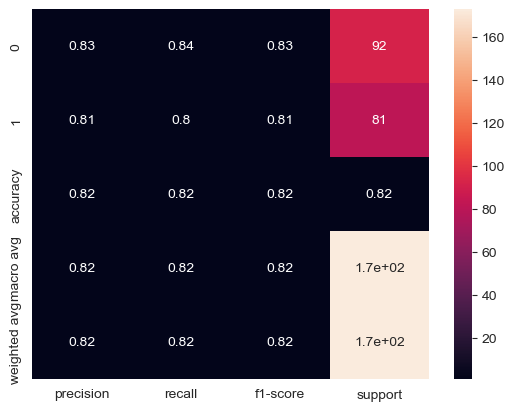

In [107]:
clsf_repo = classification_report(y_test,best_adb_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T,annot=True)

In [108]:
from sklearn.metrics import roc_auc_score


In [109]:
print("roc auc score::",roc_auc_score(y_test,best_adb_pred))


roc auc score:: 0.8197128287707997


In [110]:
from sklearn.metrics import roc_curve


In [111]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred, pos_label=1)


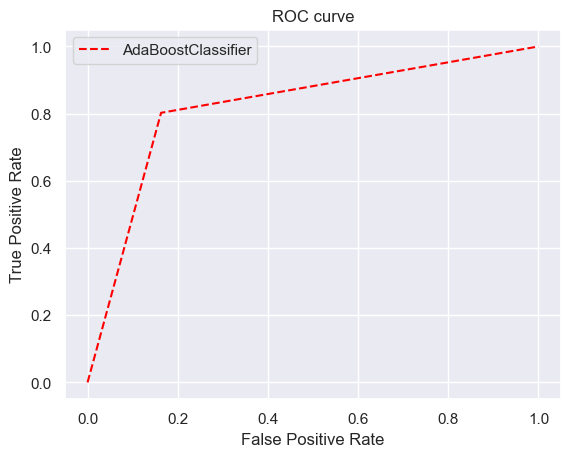

In [112]:
#plotting ROC CURVE

sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red',label='AdaBoostClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

In [115]:

model_metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Random Forest', 'AdaBoost'],
    'Accuracy': [0.7687861271676301, 0.7456647398843931, 0.7803468208092486, 0.7976878612716763, 0.8092485549132948],
}

model_df = pd.DataFrame(model_metrics)

model_df_sorted = model_df.sort_values(by='Accuracy', ascending=False)

print(model_df_sorted)


                 Model  Accuracy
4             AdaBoost  0.809249
3        Random Forest  0.797688
2  K-Nearest Neighbors  0.780347
0  Logistic Regression  0.768786
1        Decision Tree  0.745665


According to the all result Ada Boost Classifier will be the best model for prediction, because all other models are overfit.


# Saving The Model:


In [116]:
import joblib


In [117]:
joblib.dump(best_adb_grid.best_estimator_,'Titanic_Prediction_Project.obj')


['Titanic_Prediction_Project.obj']